In [7]:
from model.LstmKAN import LstmKAN
from model.LSTMModel import LSTMModel
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from data_process.DataModule import DataModule

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_scaler, output_scaler, train_dataloader, test_dataloader = DataModule()

# 参数定义
input_size = 1024
hidden_size = 128
num_layers = 2
output_size = 1024

model = LstmKAN(input_size, hidden_size, num_layers, output_size).to(device)

# 超参数
num_epochs = 2000
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model.train()
    for batch_inputs, batch_targets in train_dataloader:

        outputs = model(batch_inputs.unsqueeze(1))
        loss = criterion(outputs, batch_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 评估模型
model.eval()
total_loss = 0
with torch.no_grad():
    for batch_inputs, batch_targets in test_dataloader:
        outputs = model(batch_inputs.unsqueeze(1))

        test_loss = criterion(outputs, batch_targets)
        total_loss += test_loss.item()

average_loss = total_loss / len(test_dataloader)
print(f"average_loss: {average_loss:.4f}")


Epoch [1/1], Loss: 0.0363
average_loss: 0.0362


In [2]:
import matplotlib.pyplot as plt

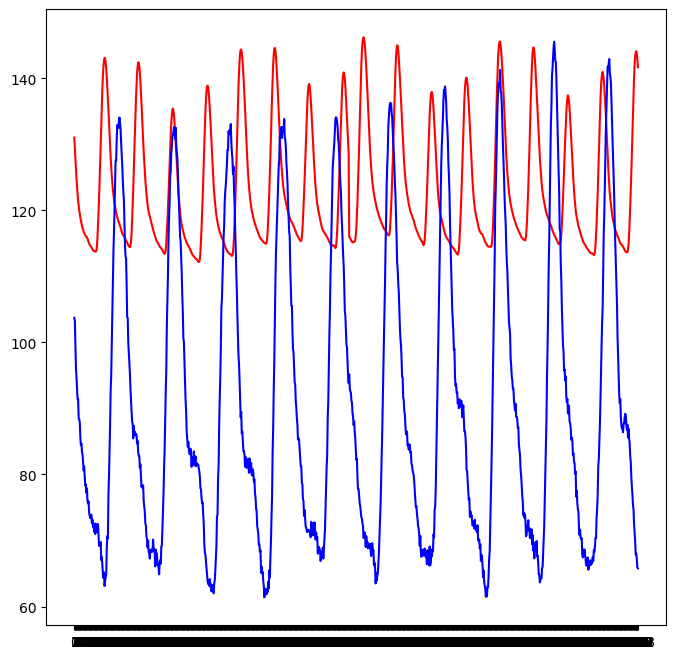

In [6]:
y1 = output_scaler.inverse_transform(batch_targets.cpu())
y2 = output_scaler.inverse_transform(outputs.cpu())

for i in range(0, len(y1)):
    plt.figure()
    plt.plot(y1[i, :], color='red')
    plt.plot(y2[i, :])
    plt.show()